In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer

from plotly.offline import iplot
import plotly as py
import plotly.tools as tls

import pickle
import dexplot as dxp

In [5]:
# Read data in the excel file
df = pd.read_csv('dataset.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
# Percentage of patients have and do not have dibetices
df['Outcome'].value_counts()/df.shape[0]*100 


0    65.104167
1    34.895833
Name: Outcome, dtype: float64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

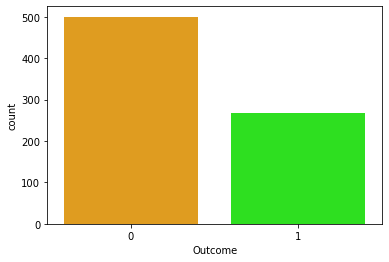

In [9]:
# Create an array with the colors you want to use
colors = ["#ffa600", "#13ff00"]# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

#sns.set_palette(sns.color_palette("Paired"))

sns.countplot(x = "Outcome", data = df)

[500 268]


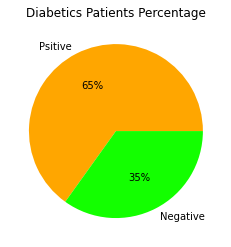

In [10]:
# Create a plot to display the percentage of the positive and negative diabeticse 
labels = ['Psitive', 'Negative']
values = df['Outcome'].value_counts().values
print(values)
plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Diabetics Patients Percentage')
plt.show()

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



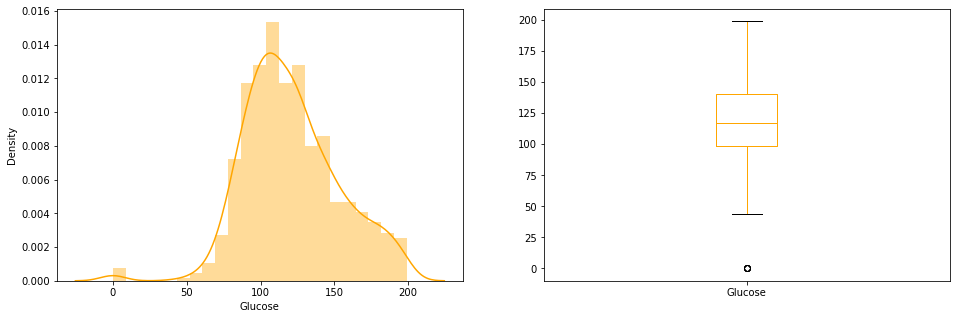

In [11]:
#Distribution of Glucose
plt.figure(1)
plt.subplot(121),sns.distplot(df['Glucose'])
plt.subplot(122), df['Glucose'].plot.box(figsize=(16,5))
plt.show()

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



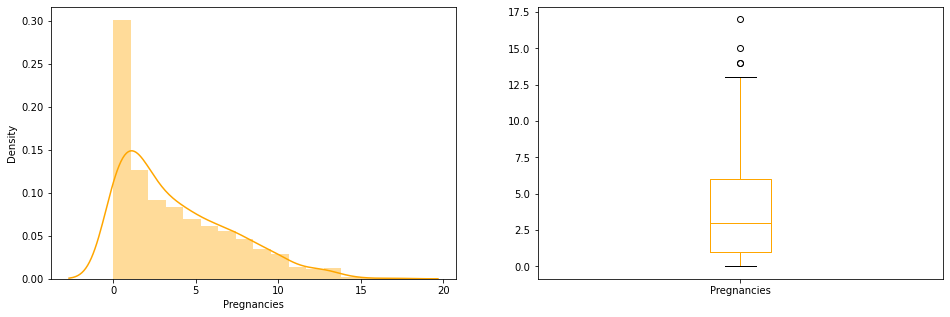

In [12]:
#Distribution of Pregnancies
plt.figure(1)
plt.subplot(121),sns.distplot(df['Pregnancies'])
plt.subplot(122), df['Pregnancies'].plot.box(figsize=(16,5))
plt.show()

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



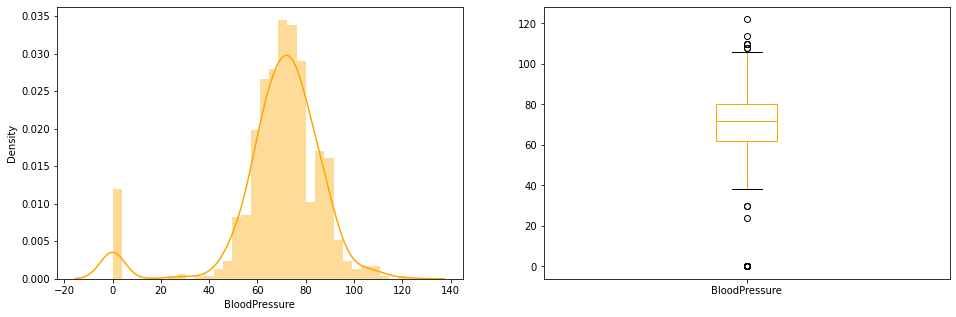

In [13]:
#Distribution of BloodPressure
plt.figure(1)
plt.subplot(121),sns.distplot(df['BloodPressure'])
plt.subplot(122), df['BloodPressure'].plot.box(figsize=(16,5))
plt.show()

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



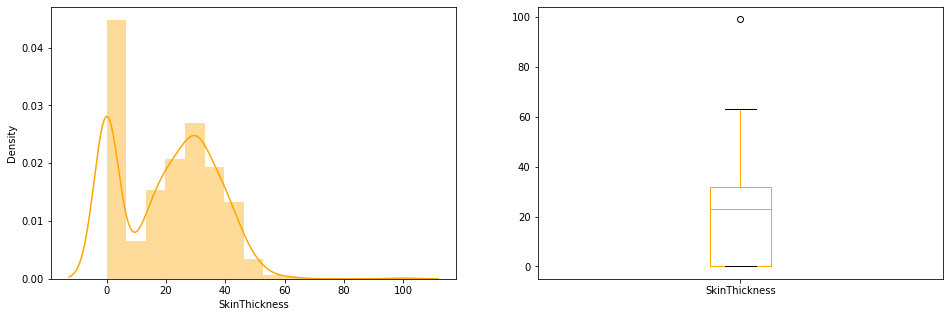

In [14]:
#Distribution of SkinThickness
plt.figure(1)
plt.subplot(121),sns.distplot(df['SkinThickness'])
plt.subplot(122), df['SkinThickness'].plot.box(figsize=(16,5))
plt.show()

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



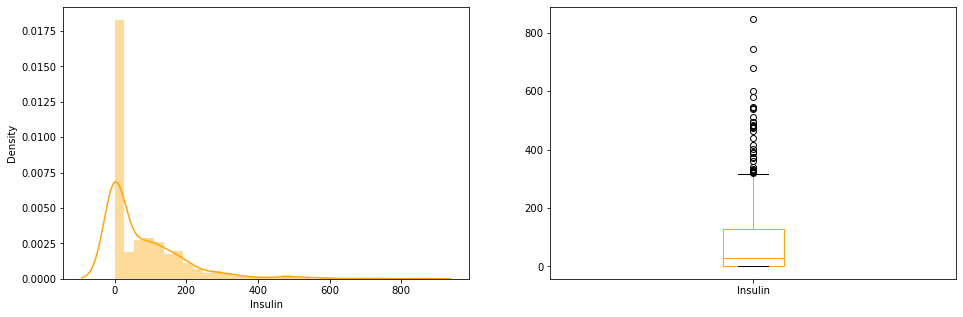

In [15]:
#Distribution of Insulin
plt.figure(1)
plt.subplot(121),sns.distplot(df['Insulin'])
plt.subplot(122), df['Insulin'].plot.box(figsize=(16,5))
plt.show()

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



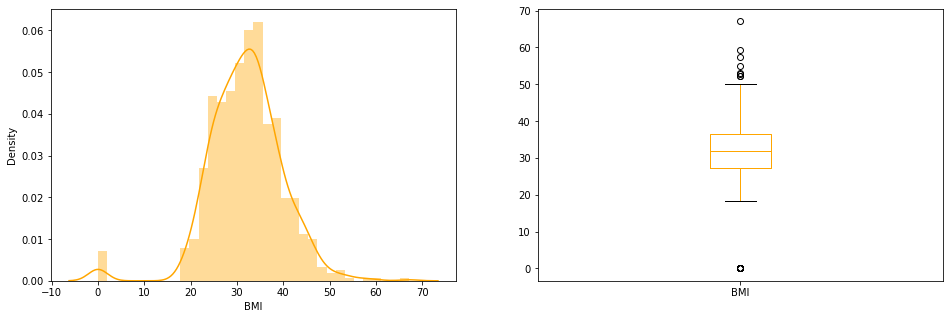

In [16]:
#Distribution of BMI
plt.figure(1)
plt.subplot(121),sns.distplot(df['BMI'])
plt.subplot(122), df['BMI'].plot.box(figsize=(16,5))
plt.show()

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



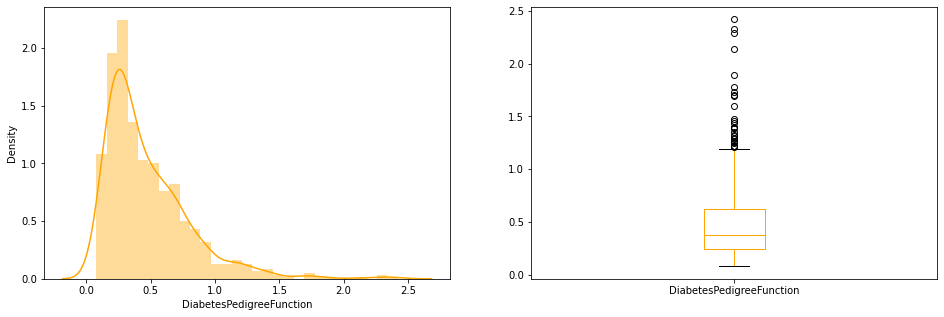

In [17]:
#Distribution of DiabetesPedigreeFunction
plt.figure(1)
plt.subplot(121),sns.distplot(df['DiabetesPedigreeFunction'])
plt.subplot(122), df['DiabetesPedigreeFunction'].plot.box(figsize=(16,5))
plt.show()

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



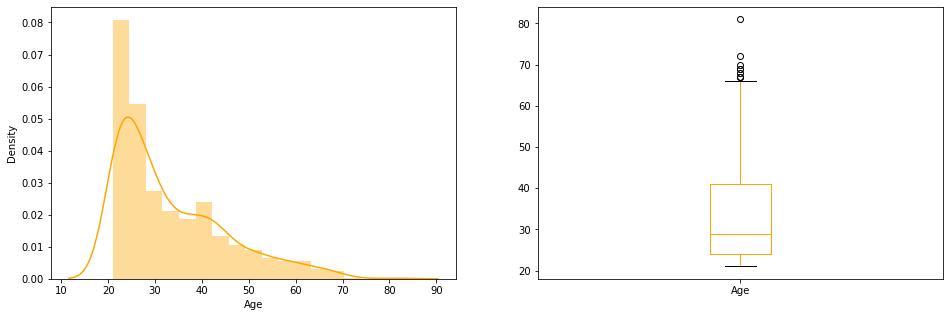

In [18]:
#Distribution of Age
plt.figure(1)
plt.subplot(121),sns.distplot(df['Age'])
plt.subplot(122), df['Age'].plot.box(figsize=(16,5))
plt.show()

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



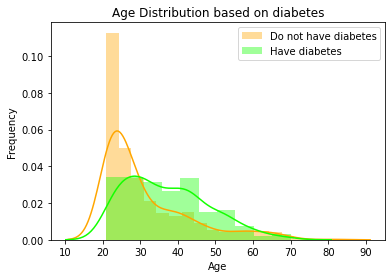

In [20]:
# Display age distribution based on diabetes
sns.distplot(df[df['Outcome'] == 0]['Age'], label='Do not have diabetes')
sns.distplot(df[df['Outcome'] == 1]['Age'], label = 'Have diabetes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution based on diabetes')
plt.legend()
plt.show()

In [57]:
nb = df['Outcome'].value_counts(0)
b = df['Outcome'].value_counts(1)
print(nb)
print(b)

0    500
1    268
Name: Outcome, dtype: int64
0    0.651042
1    0.348958
Name: Outcome, dtype: float64


In [58]:
# Get min, max and average of the age
print('Min age: ', min(df['Age']))
print('Max age: ', max(df['Age']))
print('Average age: ', df['Age'].mean())

Min age:  21
Max age:  81
Average age:  33.240885416666664


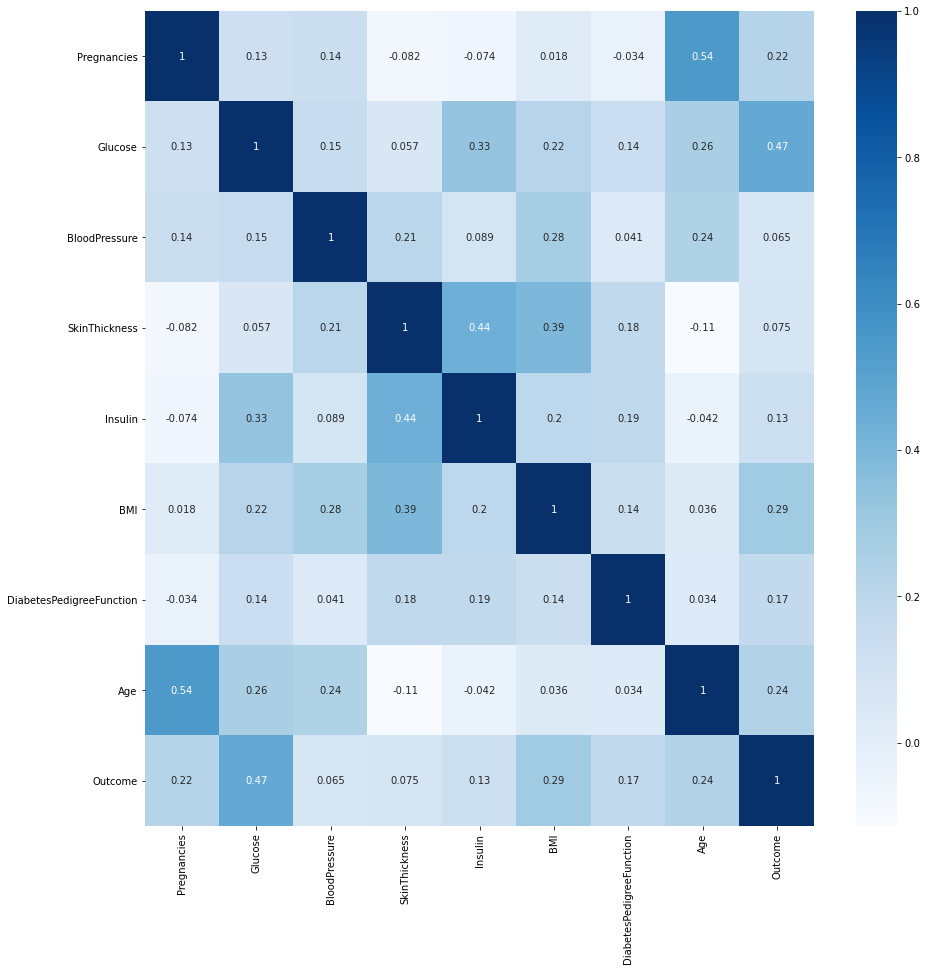

In [59]:
# Correlation map
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot = True, cmap = "Blues")
plt.show()

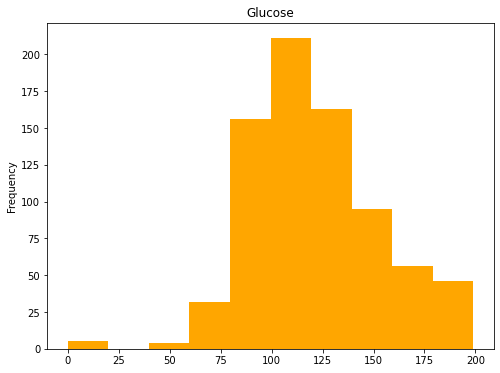

In [21]:
# Display Glucose distribution
df['Glucose'].plot(kind = 'hist', title = 'Glucose', figsize = (8, 6))
plt.show()

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



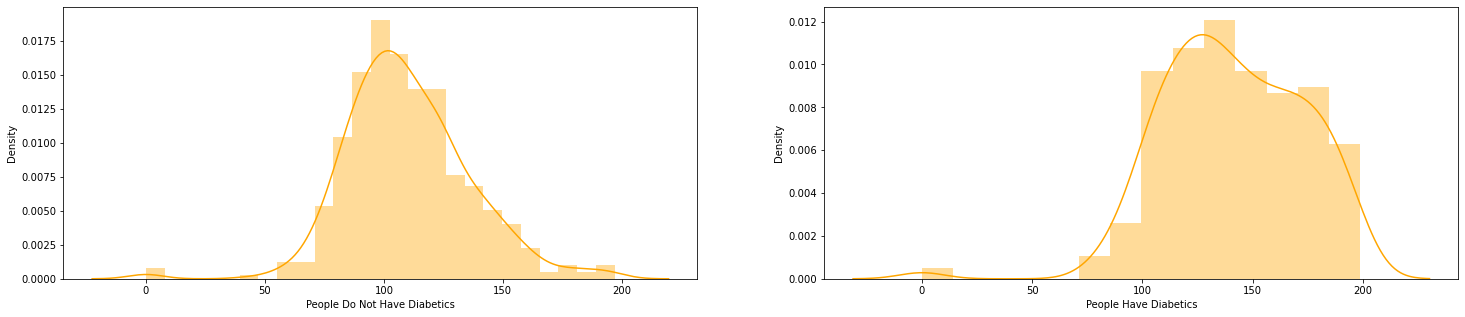

In [22]:
# Display Glucose distribution based on Diabetics
fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(25, 5))
ax = sns.distplot(df[df['Outcome'] == 0]['Glucose'], label='Do not have Diabetics', ax = axis1)
ax.set(xlabel='People Do Not Have Diabetics')
ax = sns.distplot(df[df['Outcome'] == 1]['Glucose'], label = 'Have Diabetics', ax = axis2)
ax.set(xlabel='People Have Diabetics')
plt.show()

In [23]:
# Get min, max and average of the  Glucose of the people do not have diabetics
print('Min Glucoseof people who do not have Diabetics: ', min(df[df['Outcome'] == 0]['Glucose']))
print('Max Glucose of people who do not have Diabetics: ', max(df[df['Outcome'] == 0]['Glucose']))
print('Average Glucose of people who do not have Diabetics: ', df[df['Outcome'] == 0]['Glucose'].mean())

Min Glucoseof people who do not have Diabetics:  0
Max Glucose of people who do not have Diabetics:  197
Average Glucose of people who do not have Diabetics:  109.98


In [24]:
# Get min, max and average of the Glucose of the people have diabetics
print('Min Glucoseof people who  have Diabetics: ', min(df[df['Outcome'] == 1]['Glucose']))
print('Max Glucose of people who  have Diabetics: ', max(df[df['Outcome'] == 1]['Glucose']))
print('Average Glucose of people who  have Diabetics: ', df[df['Outcome'] == 1]['Glucose'].mean())

Min Glucoseof people who  have Diabetics:  0
Max Glucose of people who  have Diabetics:  199
Average Glucose of people who  have Diabetics:  141.25746268656715


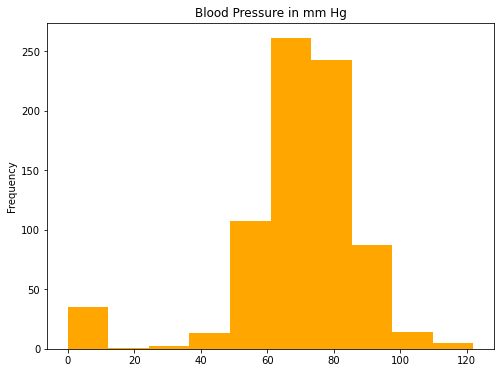

In [25]:
# Display blood pressure distribution
df['BloodPressure'].plot(kind = 'hist', title = 'Blood Pressure in mm Hg', figsize = (8, 6))
plt.show()

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



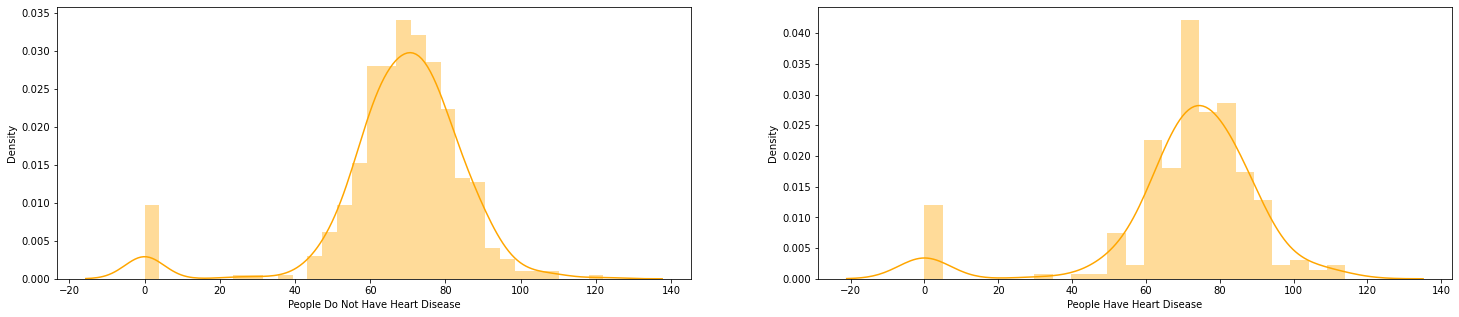

In [26]:
# Display blood pressure distribution based on heart disease
fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(25, 5))
ax = sns.distplot(df[df['Outcome'] == 0]['BloodPressure'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel='People Do Not Have Heart Disease')
ax = sns.distplot(df[df['Outcome'] == 1]['BloodPressure'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel='People Have Heart Disease')
plt.show()

In [27]:
# Get min, max and average of the  blood pressure of the people do not have heart diseas
print('Min blood pressure of people who do not have heart disease: ', min(df[df['Outcome'] == 0]['BloodPressure']))
print('Max blood pressure of people who do not have heart disease: ', max(df[df['Outcome'] == 0]['BloodPressure']))
print('Average blood pressure of people who do not have heart disease: ', df[df['Outcome'] == 0]['BloodPressure'].mean())

Min blood pressure of people who do not have heart disease:  0
Max blood pressure of people who do not have heart disease:  122
Average blood pressure of people who do not have heart disease:  68.184


In [28]:
# Get min, max and average of the  blood pressure of the people do not have heart diseas
print('Min blood pressure of people who  have heart disease: ', min(df[df['Outcome'] == 1]['BloodPressure']))
print('Max blood pressure of people who  have heart disease: ', max(df[df['Outcome'] == 1]['BloodPressure']))
print('Average blood pressure of people who  have heart disease: ', df[df['Outcome'] == 1]['BloodPressure'].mean())

Min blood pressure of people who  have heart disease:  0
Max blood pressure of people who  have heart disease:  114
Average blood pressure of people who  have heart disease:  70.82462686567165


In [29]:
# Initialize data and outcome
target = df['Outcome']
features = df.drop(['Outcome'], axis = 1)

In [30]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

In [31]:
# Train and evaluate model
def fit_eval_model(model, train_features, y_train, test_features, y_test):
    
    """
    Function: train and evaluate a machine learning classifier.
    Args:
      model: machine learning classifier
      train_features: train data extracted features
      y_train: train data lables
      test_features: train data extracted features
      y_test: train data lables
    Return:
      results(dictionary): a dictionary of classification report
    """
    results = {}
    
    # Train the model
    model.fit(train_features, y_train)
    
    # Test the model
    train_predicted = model.predict(train_features)
    test_predicted = model.predict(test_features)
    
     # Classification report and Confusion Matrix
    results['classification_report'] = classification_report(y_test, test_predicted)
    results['confusion_matrix'] = confusion_matrix(y_test, test_predicted)
        
    return results

In [32]:
# Initialize the models
sv = SVC()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
nb = GaussianNB()


# Fit and evaluate models
results = {}
for cls in [sv,rf,knn,nb]:
    cls_name = cls.__class__.__name__
    results[cls_name] = {}
    results[cls_name] = fit_eval_model(cls, X_train, y_train, X_test, y_test)

In [33]:
# Print classifiers results
for result in results:
    print (result)
    print()
    for i in results[result]:
        print (i, ':')
        print(results[result][i])
        print()
    print ('-----')
    print()

SVC

classification_report :
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       107
           1       0.73      0.51      0.60        47

    accuracy                           0.79       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.78      0.79      0.78       154


confusion_matrix :
[[98  9]
 [23 24]]

-----

RandomForestClassifier

classification_report :
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       107
           1       0.73      0.64      0.68        47

    accuracy                           0.82       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.81      0.82      0.81       154


confusion_matrix :
[[96 11]
 [17 30]]

-----

KNeighborsClassifier

classification_report :
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       107
           1       0